## Universidade Estadual de Campinas
### Instituto de Computação
### Introdução ao Processamento Digital de Imagem (MO443)
#### Professor: Hélio Pedrini
#### 1S2023

### Trabalho 1
#### Aluno: Maurício Pereira Lopes - RA 225242

In [1]:
# Especificação do problema
# O objetivo deste trabalho é realizar alguns processamentos basicos em imagens digitais. Quando
# pertinente, a vetorização de comandos deve ser empregada nas operações. 

In [2]:
# Carregamento das bibliotecas necessárias
# !pip install imageio
import imageio as iio
import matplotlib.pyplot as plt
import numpy as np
import random

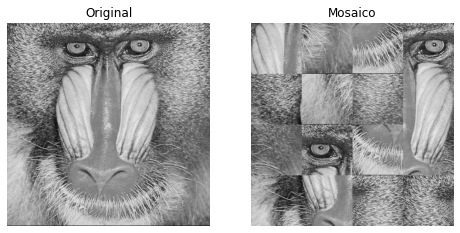

In [3]:
# ------------------------------------------
# Questão 1.1 - Mosaico
# Construir um mosaico de 4x4 blocos a partir de uma imagem monocromática.
# ------------------------------------------

# ler a imagem original
im = iio.imread('https://www.ic.unicamp.br/~helio/imagens_png/baboon.png')

# dividir a imagem original em 16 blocos
# os blocos foram salvos em uma lista
M = im.shape[0] // 4
N = im.shape[1] // 4
sub_imagens = [im[x:x+M,y:y+N] for x in range(0,im.shape[0],M) for y in range(0,im.shape[1],N)]

# a lista foi reordenada randomicamente
random.shuffle(sub_imagens)

# e convertida em um array de dimensões 16, 128, 128
sub_im_array = np.array(sub_imagens)

# cada uma das 16 sub-imagens foram juntadas novamente em uma única
# imagem final de dimensões 512, 512, mas na ordem aleatório
final_im = np.empty((512, 512))
sub_im_index = 0
for bloco_coluna in range(0, 512, 128):
    for bloco_linha in range(0, 512, 128):
            final_im[bloco_linha:bloco_linha+128, bloco_coluna:bloco_coluna+128] = sub_im_array[sub_im_index]
            sub_im_index = sub_im_index + 1

# plotar e salvar as imagens
images = [im, final_im]
labels = ["Original", "Mosaico"]
fig, axs = plt.subplots(1, 2, figsize=(8, 5))
for i in range(2):
	axs[i].imshow(images[i], cmap = "gray")
	axs[i].set_title(label = labels[i])
	axs[i].axis("off")
plt.savefig("trabalho01-questao1.1.png")
plt.show()

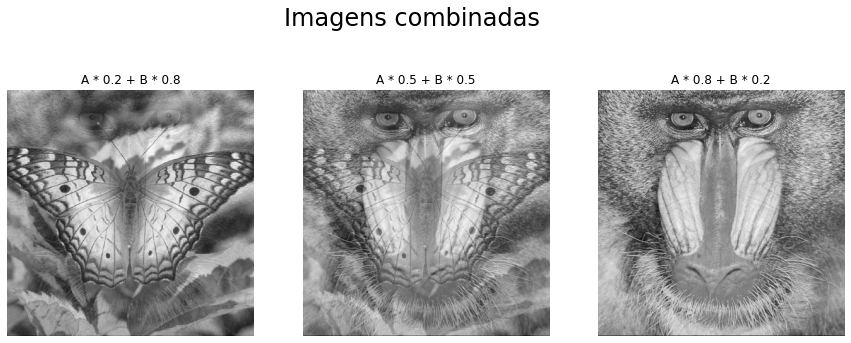

In [4]:
# ------------------------------------------
# Questão 1.2 - Combinação de imagens
# Combinar duas imagens monocromaticas de mesmo tamanho por meio da média
# ponderada de seus níveis de cinza.
# ------------------------------------------

# ler duas imagens
im_A = iio.imread('https://www.ic.unicamp.br/~helio/imagens_png/baboon.png')
im_B = iio.imread('https://www.ic.unicamp.br/~helio/imagens_png/butterfly.png')

# calcular as imagens combinadas, plotar e salvar as imagens
pesos = np.array([0.2, 0.5, 0.8])
fig, axs = plt.subplots(1, 3, figsize=(15, 6))
fig.suptitle('Imagens combinadas', fontsize=24)



for c in range(3):
    im_comb = im_A * pesos[c] + im_B * pesos[-(c + 1)]
    axs[c].imshow(im_comb, cmap='gray')
    label = 'A * ' + str(pesos[c]) + ' + B * ' + str(pesos[-(c + 1)])
    axs[c].set_title(label)
    axs[c].axis("off")
plt.savefig("trabalho01-questao1.2.png")
plt.show()

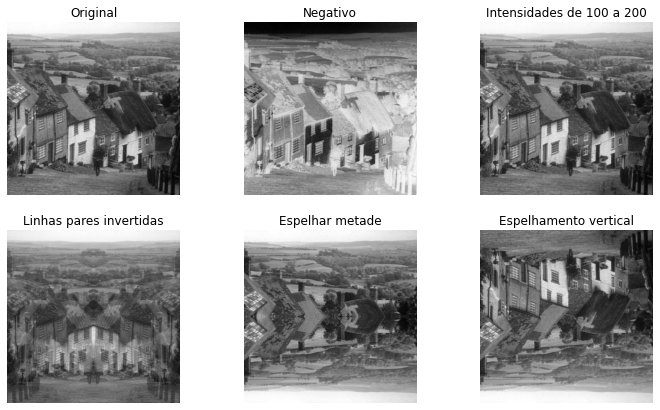

In [5]:
# ------------------------------------------
# Questão 1.3 - Transformação de Intensidade
# ------------------------------------------

# ------------------------------------------
# (a) Dada uma imagem monocromática
# ------------------------------------------
im = iio.imread('https://www.ic.unicamp.br/~helio/imagens_png/city.png')

# ------------------------------------------
# (b) obter o negativo da imagem
# ------------------------------------------
im_negativa = 255 - im

# ------------------------------------------
# (c) converter o intervalo de intensidades para [100, 200]
# ------------------------------------------
lim_sup = 200
lim_inf = 100
im_contraste = ((im * ((lim_sup - lim_inf) / 255)) + lim_inf).astype(np.uint8)

# ------------------------------------------
# (d) inverter os valores dos pixels das linhas pares da imagem
# ------------------------------------------
im_linhas_inv = im.copy()

for r in range(0, 512, 2):
    im_linhas_inv[r, :] = im[r, ::-1]

# ------------------------------------------
# (e) espelhar as linhas da metade superior da imagem
# na parte inferior da imagem
# ------------------------------------------
im_espelhada = im.copy()

im_espelhada[256:, :] = im_espelhada[0:256, :][::-1, ...]

# ------------------------------------------
# (f) aplicar um espelhamento vertical na imagem
# levando-se em conta todas as linhas da imagem
# ------------------------------------------
im_flip_vertical = im.copy()

im_flip_vertical = im_flip_vertical[::-1, ...]


# ------------------------------------------
# plotar e salvar as imagens
# ------------------------------------------
imagens = np.array([["Original", "Negativo", "Intensidades de 100 a 200", "Linhas pares invertidas", "Espelhar metade", "Espelhamento vertical"],
                    [im, im_negativa, im_contraste, im_linhas_inv, im_espelhada, im_flip_vertical]],
                  dtype = "object")
fig, axs = plt.subplots(2, 3, figsize = (12, 7))

im_idx = 0
for i in [0, 1]:
    for j in [0, 1, 2,]:
        axs[i, j].imshow(imagens[1, im_idx], cmap = "gray")
        axs[i, j].set_title(imagens[0, im_idx])
        axs[i, j].axis("off")
        im_idx = im_idx + 1
plt.savefig("trabalho01-questao1.3.png")
plt.show()

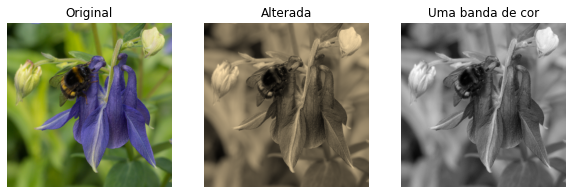

In [6]:
# ------------------------------------------
# Questão 1.4 - Imagens coloridas
# ------------------------------------------


# ------------------------------------------
# (a) dada uma imagem colorida no formato RGB,
# altere a imagem conforme as seguintes operações
#
# R' = 0.393R + 0.769G + 0.189B
# G' = 0.349R + 0.686G + 0.168B
# B' = 0.272R + 0.534G + 0.131B
# ------------------------------------------

# lendo uma imagem colorida
im_color = iio.imread('https://webpages.tuni.fi/imaging/tampere17/t095.png')

# cálculos
nova_im = np.ones((512, 512, 3))
nova_im[:, :, 0] = im_color[:, :, 0] * 0.393 + im_color[:, :, 1] * 0.769 + im_color[:, :, 2] * 0.189
nova_im[:, :, 1] = im_color[:, :, 0] * 0.349 + im_color[:, :, 1] * 0.686 + im_color[:, :, 2] * 0.168
nova_im[:, :, 2] = im_color[:, :, 0] * 0.272 + im_color[:, :, 1] * 0.534 + im_color[:, :, 2] * 0.131

# ajusde da imagem para profundidade de 0 a 255
nova_im = (((nova_im - nova_im.min()) * 255) / (nova_im.max() - nova_im.min())).astype(int)


# ------------------------------------------
# (b) dada uma imagem colorida no formato RGB,
# altere a imagem tal que ela contenha apenas
# uma banda de cor, cujos valores são calculados
# pela médis ponderada:
#
# I = 0.2989R + 0.5870G + 0.1140B
# ------------------------------------------
I = np.array((512, 512))
I = (im_color[:, : , 0] * 0.2989 + im_color[:, : , 1] * 0.5870 + im_color[:, : , 2] * 0.1140).astype(int)



# ------------------------------------------
# plot das imagens
# ------------------------------------------
imagens = [im_color, nova_im, I]
labels = ["Original", "Alterada", "Uma banda de cor"]
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
for i in range(3):
	axs[i].imshow(imagens[i], cmap = "gray")
	axs[i].set_title(label = labels[i])
	axs[i].axis("off")
plt.savefig("trabalho01-questao1.4.png")
plt.show()

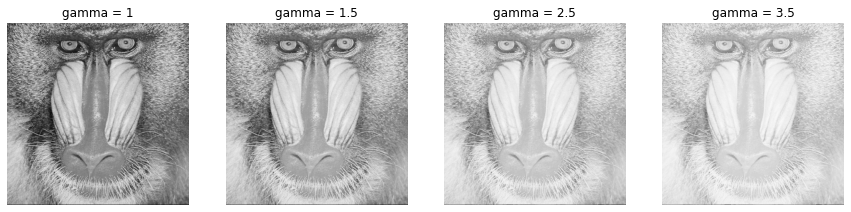

In [7]:
# ------------------------------------------
# Questão 1.5 - Ajuste de Brilho
# ------------------------------------------

# ------------------------------------------
# lendo uma imagem
im = iio.imread('https://www.ic.unicamp.br/~helio/imagens_png/baboon.png')

# definindo os valores de gama
gamma = [1, 1.5, 2.5, 3.5]

# convertendo os pixels para os valores de 0 a 1
im_0_to_1 = ((im * ((1 - 0) / 255)) + 0)

# aplicando a equação B = A ** (1/gamma)
# e salvando as imagens em uma lista de arrays
# após convertê-las de volta para 0 a 255
im_B = []
for i in range(4):
    im_B.append(im_0_to_1 ** (1/gamma[i]))
    im_B[i] = (im_B[i] * 255).astype(int)


# plotando as imagens
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
for i in range(4):
    axs[i].imshow(im_B[i], cmap='gray')
    axs[i].set_title(label = ("gamma = " + str(gamma[i])))
    axs[i].axis("off")
plt.savefig("trabalho01-questao1.5.png")
plt.show()

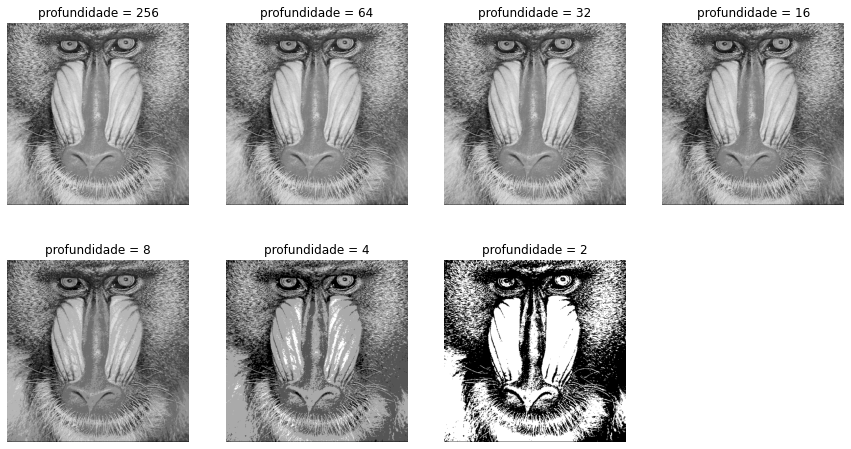

In [28]:
# ------------------------------------------
# Questão 1.6 - Quantização de Imagens
# ------------------------------------------


# lendo uma imagem e a convertendo para níveis de 0 a 1
im = iio.imread('https://www.ic.unicamp.br/~helio/imagens_png/baboon.png')
im_0_to_1 = ((im * ((1 - 0) / 255)) + 0)

# definindo uma lista de níveis de profundidade da imagem
depth = [256, 64, 32, 16, 8, 4, 2]

# fazendo a quantização da imagem e salvando as imagens
# quantizadas em uma lista
im_quantizada = []
for i in range(0, 7):
    im_quantizada.append((im_0_to_1 * depth[i]).astype(int))


# plotando as imagens quantizadas
depth_idx = 0
fig, axs = plt.subplots(2, 4, figsize=(15, 8))
for i in range(2):
    for j in range(4):
    	if depth_idx < 7:
        	axs[i, j].imshow(im_quantizada[depth_idx], cmap='gray')
        	axs[i, j].set_title(label = ("profundidade = " + str(depth[depth_idx])))
        	axs[i, j].axis("off")
        	depth_idx = depth_idx + 1
fig.delaxes(axs[1,3])
plt.savefig("trabalho01-questao1.6.png")
plt.show()

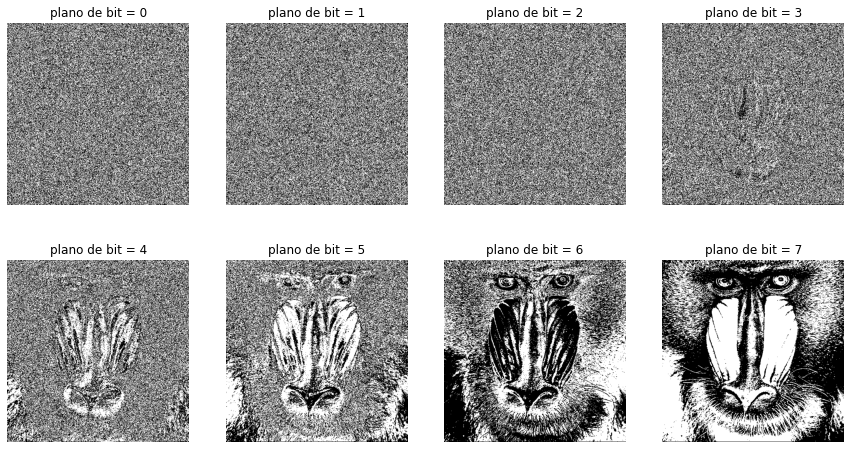

In [11]:
# ------------------------------------------
# Questão 1.7 - Planos de Bits
# ------------------------------------------

# lendo ima imagem
im = iio.imread('https://www.ic.unicamp.br/~helio/imagens_png/baboon.png')

# definindo uma lista dos planos de bits a serem plotados
plano_bit = [0, 1, 2, 3, 4, 5, 6, 7]

# gerando as imagens dos planos de bits e salvando em uma lista
new_im_list = []
for i in plano_bit:
    new_im_list.append(im & (2 ** i))

# plotando as imagens
plano_bit_idx = 0
fig, axs = plt.subplots(2, 4, figsize=(15, 8))
for i in range(2):
    for j in range(4):
    	if plano_bit_idx < 8:
        	axs[i, j].imshow(new_im_list[plano_bit_idx], cmap='gray')
        	axs[i, j].set_title(label = ("plano de bit = " + str(plano_bit[plano_bit_idx])))
        	axs[i, j].axis("off")
        	plano_bit_idx = plano_bit_idx + 1
plt.savefig("trabalho01-questao1.7.png")
plt.show()

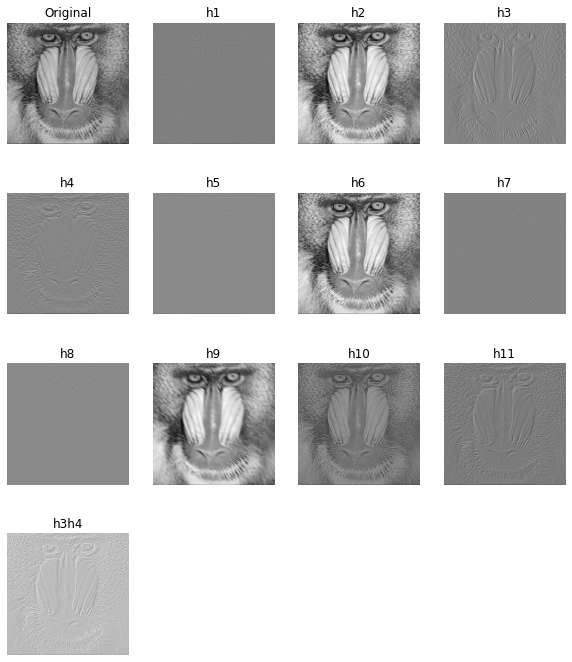

In [78]:
# ------------------------------------------
# Questão 1.8 - Filtragem de Imagens
# ------------------------------------------

# ler uma imagem
im = iio.imread('https://www.ic.unicamp.br/~helio/imagens_png/baboon.png')


# definir os filtros
h1 = np.array([[0, 0, -1, 0, 0],
              [0, -1, -2, -1, 0],
              [-1, -2, 16, -2, -1],
              [0, -1, -2, -1, 0],
              [0, 0, -1, 0, 0]])

h2 = (1 / 256) * np.array([[1, 4, 6, 4, 1],
                         [4, 16, 24, 16, 4],
                         [6, 24, 36, 24, 6],
                         [4, 16, 24, 16, 4],
                         [1, 4, 6, 4, 1]])

h3 = np.array([[-1, 0, 1],
              [-2, 0, 2],
              [-1, 0, 1]])

h4 = np.array([[-1, -2, -1],
              [0, 0, 0],
              [1, 2, 1]])

h5 = np.array([[-1, -1, -1],
              [-1, 8, -1],
              [-1, -1, -1]])

h6 = (1 / 9) * np.array([[1, 1, 1],
                         [1, 1, 1],
                         [1, 1, 1]])

h7 = np.array([[-1, -1, 2],
              [-1, 2, -1],
              [2, -1, -1]])

h8 = np.array([[2, -1, -1],
              [-1, 2, -1],
              [-1, -1, 2]])

h9 = (1 / 9) * np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 1, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 1, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 1, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 1, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 1, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 1, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 1, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 1]])

h10 = (1 / 8) * np.array([[-1, -1, -1, -1, -1],
                         [-1, 2, 2, 2, -1],
                         [-1, 2, 8, 2, -1],
                         [-1, 2, 2, 2, -1],
                         [-1, -1, -1, -1, -1]])

h11 = np.array([[-1, -1, 0],
               [-1, 0, 1],
               [0, 1, 1]])


# definir uma função que recebe a imagem 512 por 512, e o filtro a ser aplicado
def filtrar(img, filtro):
    pad_size = int(filtro.shape[0] / 2)
    img_pad = np.pad(img, pad_size, mode = "reflect")
    new_img = np.ones((512, 512))
    
    for i in range(512):
        for j in range(512):
            new_img[i, j] = np.sum(img_pad[i:filtro.shape[0]+i, j:filtro.shape[1]+j] * filtro)
            
    new_img = ((new_img - new_img.min()) * 255) / (new_img.max() - new_img.min())
    

    
    return new_img


# aplicar os filtros solicitados e salvar as imagens em uma lista
im_filtradas = [im]
filtros = [h1, h2, h3, h4, h5, h6, h7, h8, h9, h10, h11]
for i in filtros:
    im_filtradas.append((filtrar(im, i)).astype(np.uint8))

# aplicar os filtros h3 e h4 combinados
img_filtrada_h3 = filtrar(im, h3)
img_filtrada_h4 = filtrar(im, h4)
img_comb = np.sqrt((img_filtrada_h3) ** 2 + (img_filtrada_h4) ** 2).astype(int)
im_filtradas.append(img_comb)


# plotar e salvar arquivo com as imagens filtradas
labels = ["Original", "h1", "h2", "h3", "h4", "h5", "h6", "h7", "h8", "h9", "h10", "h11", "h3h4"]
labels_idx = 0
fig, axs = plt.subplots(4, 4, figsize=(10, 12))
for i in range(4):
    for j in range(4):
    	if labels_idx < 13:
        	axs[i, j].imshow(im_filtradas[labels_idx], cmap='gray', vmin=0, vmax=255)
        	axs[i, j].set_title(label = (str(labels[labels_idx])))
        	axs[i, j].axis("off")
        	labels_idx = labels_idx + 1
fig.delaxes(axs[3,1])
fig.delaxes(axs[3,2])
fig.delaxes(axs[3,3])
plt.savefig("trabalho01-questao1.8.png")
plt.show()

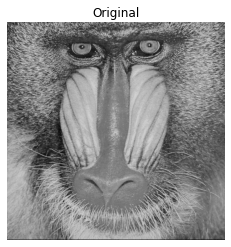

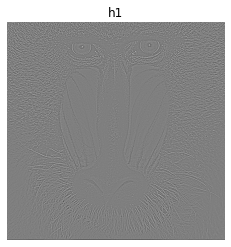

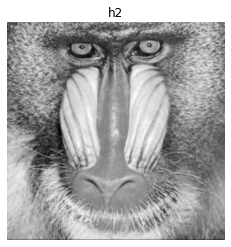

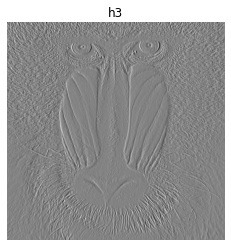

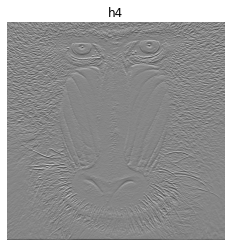

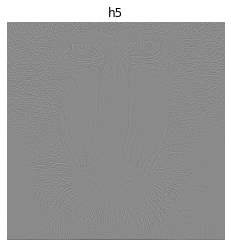

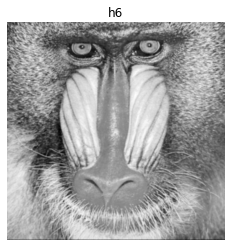

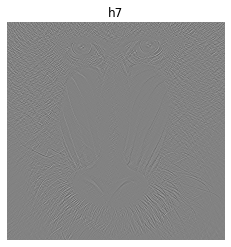

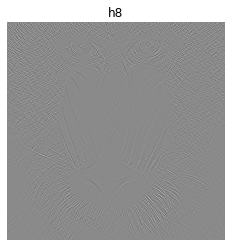

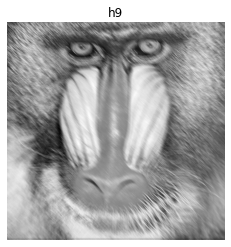

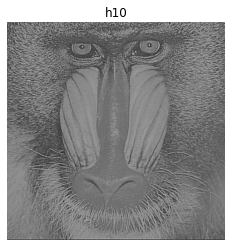

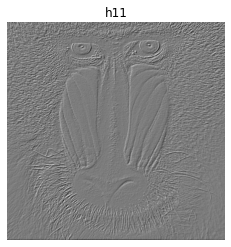

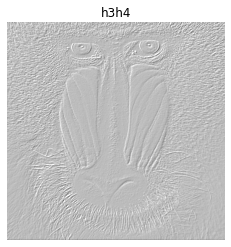

In [79]:
# plotar e salvar individualmente as imagens filtradas
for i in range(0, 13):
    plt.imshow(im_filtradas[i], cmap='gray', vmin=0, vmax=255)
    plt.title(labels[i])
    plt.axis("off")
    plt.savefig("trabalho01-questao1.8." + labels[i] + ".png")
    plt.show()